### Spam mail detection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("D:\\email spam\\spam.csv",encoding='latin1')

In [4]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Missing Values

In [6]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
data["Unnamed: 2"].fillna("",axis=0,inplace=True)

In [8]:
data["Unnamed: 3"].fillna("",axis=0,inplace=True)

In [9]:
data["Unnamed: 4"].fillna("",axis=0,inplace=True)

In [10]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,,,
5568,ham,Will Ì_ b going to esplanade fr home?,,,
5569,ham,"Pity, * was in mood for that. So...any other s...",,,
5570,ham,The guy did some bitching but I acted like i'd...,,,


In [11]:
d=data["v2"]+data["Unnamed: 2"]+data["Unnamed: 3"]+data["Unnamed: 4"]
d

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Length: 5572, dtype: object

In [12]:
db={"messege":d}

In [13]:
db1=pd.DataFrame(db)
db1

,messege
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [14]:
new_data=pd.concat([data,db1],axis=1)
new_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,messege
0,ham,"Go until jurong point, crazy.. Available only ...",,,,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,,,,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,,,,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,,,,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,,,,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",,,,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,,,,The guy did some bitching but I acted like i'd...


In [15]:
new_data.drop(["v2","Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [16]:
new_data

,v1,messege
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Lable Encoder

In [17]:
new_data["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder=LabelEncoder()

In [20]:
new_data["Target"]=encoder.fit_transform(new_data["v1"])

In [21]:
new_data.drop(["v1"],axis=1,inplace=True)

In [22]:
new_data.head()

,messege,Target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


### Check Duplicated

In [23]:
new_data.duplicated().sum()

403

In [24]:
new_data_dup=new_data[new_data.duplicated(keep="first")]

In [25]:
new_data_dup

,messege,Target
102,As per your request 'Melle Melle (Oru Minnamin...,0
153,As per your request 'Melle Melle (Oru Minnamin...,0
206,"As I entered my cabin my PA said, '' Happy B'd...",0
222,"Sorry, I'll call later",0
325,No calls..messages..missed calls,0
...,...,...
5524,You are awarded a SiPix Digital Camera! call 0...,1
5535,"I know you are thinkin malaria. But relax, chi...",0
5539,Just sleeping..and surfing,0
5553,Hahaha..use your brain dear,0


In [26]:
new_data=new_data.drop_duplicates(keep="first")

In [27]:
# again check

new_data.duplicated().sum()

0

In [28]:
new_data.shape

(5169, 2)

In [29]:
new_data

,messege,Target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


### Model Building

### Spam messages

In [30]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [31]:
spam_wc=wc.generate(new_data[new_data["Target"]==1]["messege"].str.cat(sep=" "))

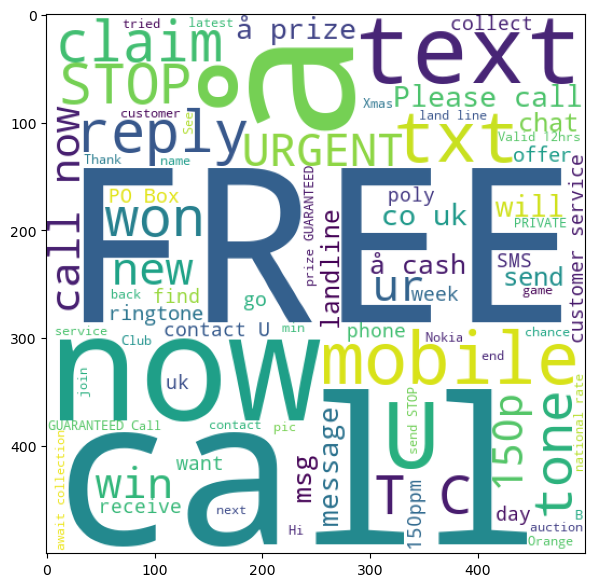

In [32]:
fig,ax=plt.subplots(figsize=(16,7))
plt.imshow(spam_wc)

### Ham Messages

In [34]:
ham_wc=wc.generate(new_data[new_data["Target"]==0]["messege"].str.cat(sep=" "))

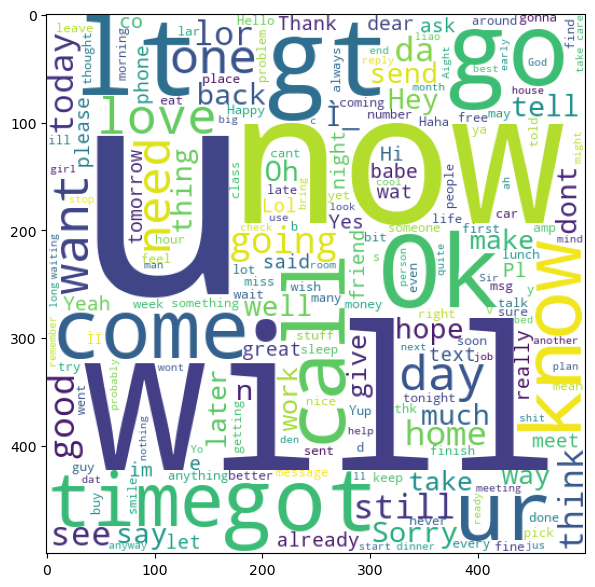

In [35]:
fig,ax=plt.subplots(figsize=(16,7))
plt.imshow(ham_wc)

### 1. Model GaussianNB

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tfidf=TfidfVectorizer(max_features=3000)  # choose one

In [38]:
x=tfidf.fit_transform(new_data["messege"]).toarray()

In [39]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
x.shape

(5169, 3000)

In [41]:
y=new_data["Target"]

In [42]:
y.shape

(5169,)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [45]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [46]:
model=GaussianNB()

In [47]:
model.fit(x_train,y_train)

GaussianNB()

In [48]:
y_pre=model.predict(x_test)

In [49]:
model.score(x_train,y_train),model.score(x_test,y_test)

(0.9064087061668682, 0.8916827852998066)

In [50]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score

In [51]:
confusionmatrix=confusion_matrix(y_test,y_pre)
print(confusionmatrix)

[[809  90]
 [ 22 113]]


In [52]:
recallscore=recall_score(y_test,y_pre)
print(recallscore)


0.837037037037037


In [53]:
precisionscore=precision_score(y_test,y_pre)
print(precisionscore)


0.5566502463054187


### 2. Model MultinomialNB

In [54]:
model2=MultinomialNB()

In [55]:
model2.fit(x_train,y_train)

MultinomialNB()

In [56]:
y_pre2=model2.predict(x_test)

In [57]:
model2.score(x_train,y_train),model2.score(x_test,y_test)

(0.981136638452237, 0.965183752417795)

In [58]:
confusionmatrix1=confusion_matrix(y_test,y_pre2)
print(confusionmatrix1)

[[899   0]
 [ 36  99]]


In [59]:
recallscore1=recall_score(y_test,y_pre2)
print(recallscore1)

0.7333333333333333


In [60]:
precisionscore1=precision_score(y_test,y_pre2)
print(precisionscore1)

1.0


### Interpretation

GaussianNB: Provides a balanced approach, but tends to incorrectly mark legitimate emails as spam. Suitable if avoiding spam is more important than occasionally misclassifying real mail.

MultinomialNB: Provides higher accuracy and reliability, ensuring no legitimate mail is wrongly flagged. However, it lets more spam pass through compared to GaussianNB.

### Deploy model

In [167]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(model2,open("model.pkl","wb"))
            

In [168]:
tfidf = pickle.load(open("vectorizer.pkl", "rb"))
model = pickle.load(open("model.pkl", "rb"))
